In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import svd

cancer_data = pd.read_csv('data.csv')

cancer_data = cancer_data.drop(columns= ['Unnamed: 32'])
cancer_data = cancer_data.iloc[:, 1:12]
#cancer_data['diagnosis'] = cancer_data['diagnosis'].map(new_cancer_diagnosis)
cancer_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [67]:
# get the attribute Names
attributeNames = list(cancer_data.columns)[1:]  # Exclude the 'diagnosis' column
attributeNames

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [68]:
#classLabels = cancer_data.iloc[:, 0].to_list()
#classLabels

classNames = sorted(set(cancer_data['diagnosis']))
classNames

['B', 'M']

In [69]:
classDict = dict(zip(classNames, range(2)))
classDict

{'B': 0, 'M': 1}

In [70]:
y = np.asarray([classDict[value] for value in cancer_data['diagnosis']])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Till here we are ok 

In [71]:
X = cancer_data.iloc[:, 2:].values
X

array([[1.038e+01, 1.228e+02, 1.001e+03, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [1.777e+01, 1.329e+02, 1.326e+03, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [2.125e+01, 1.300e+02, 1.203e+03, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [2.808e+01, 1.083e+02, 8.581e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.933e+01, 1.401e+02, 1.265e+03, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [2.454e+01, 4.792e+01, 1.810e+02, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [72]:
N = X.shape[0]  # Assuming N is the number of samples (rows) in X
M = X.shape[1]  # Assuming M is the number of attributes (columns) in X
C = len(classNames)

print(X)
print(M)
print(C)
print(classNames)

[[1.038e+01 1.228e+02 1.001e+03 ... 1.471e-01 2.419e-01 7.871e-02]
 [1.777e+01 1.329e+02 1.326e+03 ... 7.017e-02 1.812e-01 5.667e-02]
 [2.125e+01 1.300e+02 1.203e+03 ... 1.279e-01 2.069e-01 5.999e-02]
 ...
 [2.808e+01 1.083e+02 8.581e+02 ... 5.302e-02 1.590e-01 5.648e-02]
 [2.933e+01 1.401e+02 1.265e+03 ... 1.520e-01 2.397e-01 7.016e-02]
 [2.454e+01 4.792e+01 1.810e+02 ... 0.000e+00 1.587e-01 5.884e-02]]
9
2
['B', 'M']


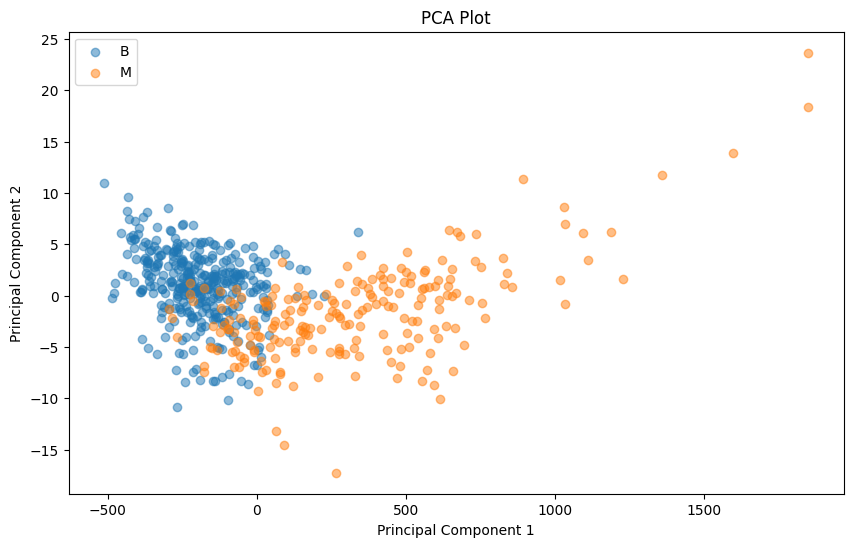

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
for c in range(len(classNames)):
    plt.scatter(X_pca[y == c, 0], X_pca[y == c, 1], label=classNames[c], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.legend()
plt.show()

PCA plot

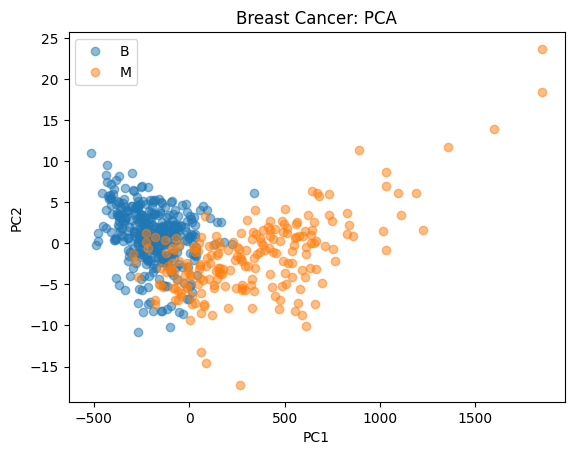

[9.99740054e-01 1.41140859e-04 1.18757544e-04 3.98685761e-08
 4.07778767e-09 2.37795294e-09 1.01406939e-09 3.68514829e-10
 6.10697621e-11]


In [74]:
#Standardize the data
Y = X - np.ones((N, 1)) * X.mean(0)

# PCA by computing SVD of Y
U, S1, Vh = svd(Y, full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title("Breast Cancer: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
legend(classNames)
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))

# Output result to screen
show()

# Compute variance explained by principal components
rho = (S1 * S1) / (S1 * S1).sum()
print(rho)

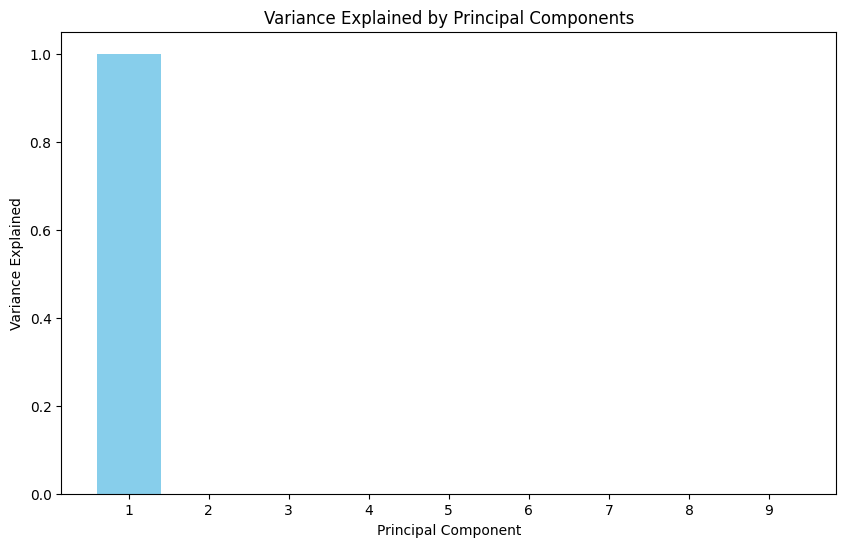

In [75]:
principal_components = np.arange(1, len(rho) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(principal_components, rho, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.xticks(principal_components)
plt.show()

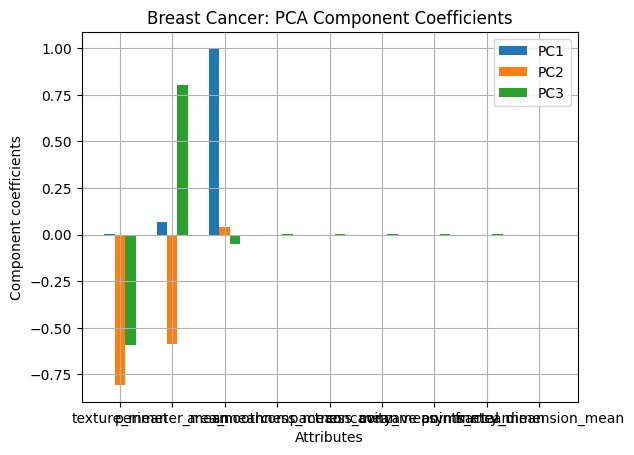

In [66]:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Breast Cancer: PCA Component Coefficients")
plt.show()

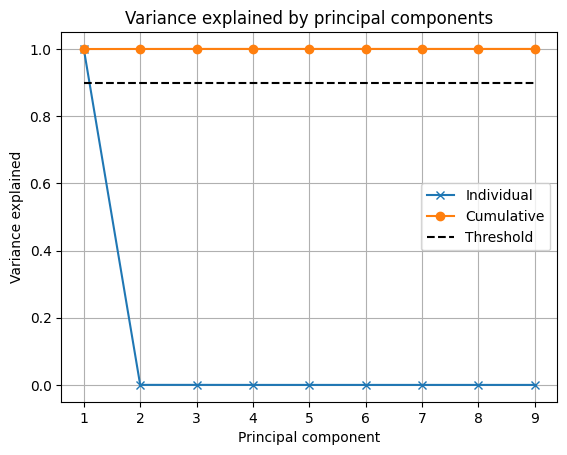

In [76]:
threshold = 0.9

plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()